In [1]:
library(ISLR) # for Hitters dataset
library(leaps) # for best subset selection
library(DMwR2) # for handling NAs in R
library(ggplot2)
library(ggrepel)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



## Data process

Viewing data.

In [2]:
# fix(Hitters)
names(Hitters)
dim(Hitters)
# View(Hitters)

[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

[1] 322  20

Handling with NAs

In [3]:
sum(is.na(Hitters$Salary))
# DMwR2: manyNAs function can return index of rows which have specified ratio NAs
# if we need delete columns with specified ratio NAs, we should transpose the data
manyNAs(t(Hitters), nORp = 0.1) 
# View(t(Hitters))
row.names(t(Hitters)) 
# delete NAs in row
dim(Hitters)
Hitters <- na.omit(Hitters)
dim(Hitters)

[1] 59

Salary 
    19

[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

[1] 322  20

[1] 263  20

## Best Subset Selection

In [17]:
# always kill the terminal 
lp.fit <- leaps(x = Hitters[, -19], y = Hitters$Salary, method = "adjr2", nbest = 19)

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = NCOL(x) + int, :
"only the first string in a char vector used in .Fortran"


: 

: 

### Use Regsubsets function
Regsubsets function performs best subset selection by identifying the best model that contains a given number of predictors, where *best* is quantified using RSS.

In [4]:
regfit <- regsubsets(Salary~., data = Hitters, nvmax=19)
reg.summary <- summary(regfit)
names(reg.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

Find the best model in different numbers of predictors using specieied criteria, such as adjusted $R^2$, RSS and $C_p$ (we used adjuste $R^2$).

1. Define function to change columns' name

In [5]:
#' Change column's name which is combined by column's name 
#' and a level of factor to new column's name which includes
#' column's name only.
#' @param before: type of character, includes column's name only 
#' @param after: type of character, includes column's name combined 
#' by column's name and a level of factor
#' @return: changed columns' name
changed_factor_names <- function(before, after){
    for(i in (1: length(before))){
        index <- grep(paste("^", before[i], sep = ""), after)
        if(length(index) != 0){
            after[index] <- before[i]
        }
    }
    return(after)
}

2. Select best model

In [6]:
# the sentences returning by paste function has quotation marks
paste("the number of predictor identifying by max rsq is", which.max(reg.summary$adjr2))
cat("the number of predictor identifying by max rsq is", which.max(reg.summary$adjr2))
coef(regfit, which.max(reg.summary$adjr2))
factor_name <- c("League", "Division", "NewLeague")
modeldata_adjr2 <- Hitters[, changed_factor_names(before = factor_name, after = names(coef(regfit, which.max(reg.summary$adjr2))[-1]))]
lr_adjr2 <- lm(Hitters$Salary~., data = modeldata_adjr2)
summary(lr_adjr2)

[1] "the number of predictor identifying by max rsq is 11"

the number of predictor identifying by max rsq is 11

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 135.7512195   -2.1277482    6.9236994    5.6202755   -0.1389914    1.4553310 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
   0.7852528   -0.8228559   43.1116152 -111.1460252    0.2894087    0.2688277


Call:
lm(formula = Hitters$Salary ~ ., data = modeldata_adjr2)

Residuals:
   Min     1Q Median     3Q    Max 
-932.2 -175.4  -29.2  130.4 1897.2 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  135.75122   71.34623   1.903 0.058223 .  
AtBat         -2.12775    0.53746  -3.959 9.81e-05 ***
Hits           6.92370    1.64612   4.206 3.62e-05 ***
Walks          5.62028    1.59064   3.533 0.000488 ***
CAtBat        -0.13899    0.05609  -2.478 0.013870 *  
CRuns          1.45533    0.39270   3.706 0.000259 ***
CRBI           0.78525    0.20978   3.743 0.000225 ***
CWalks        -0.82286    0.26361  -3.121 0.002010 ** 
LeagueN       43.11162   39.96612   1.079 0.281755    
DivisionW   -111.14603   39.21835  -2.834 0.004970 ** 
PutOuts        0.28941    0.07478   3.870 0.000139 ***
Assists        0.26883    0.15816   1.700 0.090430 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 311.7 on 251 degrees of freed

Plot figures which the regsubsets function produced.\
The block square means including the corresponding predictor.  

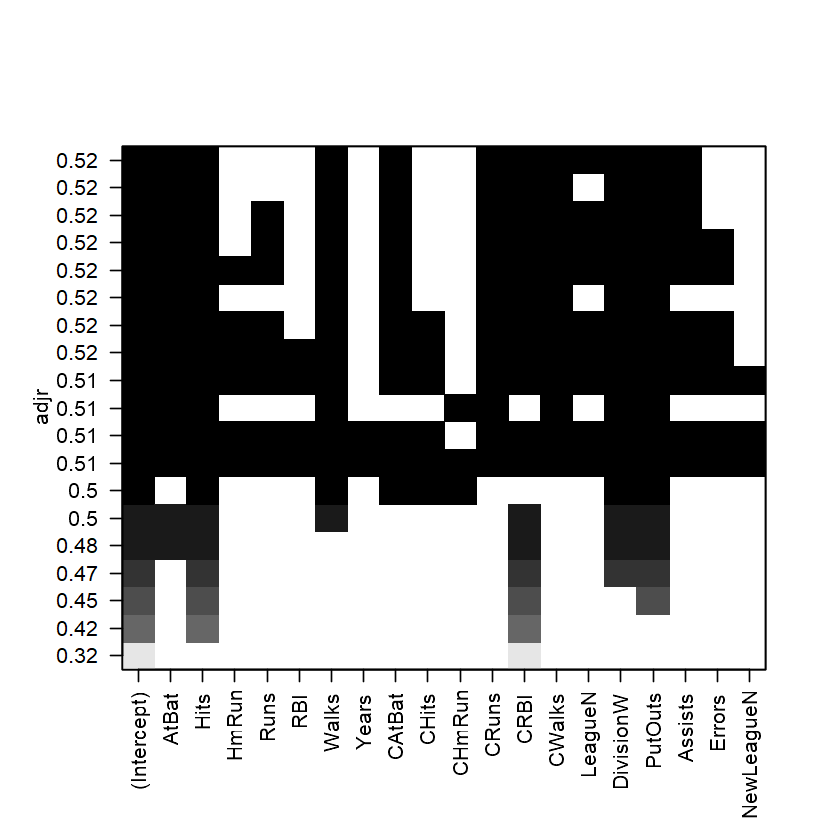

In [7]:
plot(regfit, scale="adjr")
# plot(regfit, scale = "bic")

## Tips
1. convert factors to int
2. convert other type of data to factors
3. replace levels in factor

In [8]:
a <- Hitters[1: 10, c("AtBat", "Division")]
a$Division
# convert factor to numeric
a$Division <- as.numeric(a$Division)
a$Division
# convert to factors
a$Division <- factor(a$Division)
a$Division
# replace levels in factor
levels(a$Division) <- c("E", "W")
a$Division

[1] W W E E W E W W E E
Levels: E W

[1] 2 2 1 1 2 1 2 2 1 1

[1] 2 2 1 1 2 1 2 2 1 1
Levels: 1 2

[1] W W E E W E W W E E
Levels: E W